In [116]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import graphviz
df = pd.read_csv('analisisDGAC.csv', encoding='latin-1')

In [117]:
df.head()

,ï»¿ECCAIRSNUMBER,Local date,Occurrence class,Aircraft registration,Occurrence category,Operation type,Operation type.1,Operator type,Weather conditions,Mass group,Location name,Total fatalities
0,INCID G-01-19,3/6/2019,Serious incident,CP-2744,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Sales/rental/service,VMC,0-2 250 Kg,Beni,0
1,ACCID-04-19,3/26/2019,Accident,CP-1383,SCF-PP: powerplant failure or malfunction,Illegal,Illegal,Private owner,VMC,0-2 250 Kg,Beni,0
2,ACCID-01-19,1/1/2019,Accident,CP-1214,LOC-G: Loss of control - ground,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0
3,ACCID-02-19,3/5/2019,Accident,CP-1250,SCF-PP: powerplant failure or malfunction,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0
4,ACCID-03-19,3/24/2019,Accident,CP-1188,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Private owner,VMC,0-2 250 Kg,Beni,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ï»¿ECCAIRSNUMBER       73 non-null     object
 1   Local date             73 non-null     object
 2   Occurrence class       73 non-null     object
 3   Aircraft registration  73 non-null     object
 4   Occurrence category    73 non-null     object
 5   Operation type         72 non-null     object
 6   Operation type.1       72 non-null     object
 7   Operator type          71 non-null     object
 8   Weather conditions     72 non-null     object
 9   Mass group             73 non-null     object
 10  Location name          73 non-null     object
 11  Total fatalities       73 non-null     int64 
dtypes: int64(1), object(11)
memory usage: 7.0+ KB


In [119]:
# Convertir la columna 'Location name' a códigos numéricos
df['Location name_numeric'] = df['Location name'].astype('category').cat.codes

# Mostrar los primeros resultados para confirmar
print(df[['Location name', 'Location name_numeric']].head())

  Location name  Location name_numeric
0          Beni                      0
1          Beni                      0
2          Beni                      0
3          Beni                      0
4          Beni                      0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ï»¿ECCAIRSNUMBER       73 non-null     object
 1   Local date             73 non-null     object
 2   Occurrence class       73 non-null     object
 3   Aircraft registration  73 non-null     object
 4   Occurrence category    73 non-null     object
 5   Operation type         72 non-null     object
 6   Operation type.1       72 non-null     object
 7   Operator type          71 non-null     object
 8   Weather conditions     72 non-null     object
 9   Mass group             73 non-null     object
 10  Location name          73 non-null     object
 11  Total fatalities       73 non-null     int64 
 12  Location name_numeric  73 non-null     int8  
dtypes: int64(1), int8(1), object(11)
memory usage: 7.0+ KB


In [121]:
df.head(20)

,ï»¿ECCAIRSNUMBER,Local date,Occurrence class,Aircraft registration,Occurrence category,Operation type,Operation type.1,Operator type,Weather conditions,Mass group,Location name,Total fatalities,Location name_numeric
0,INCID G-01-19,3/6/2019,Serious incident,CP-2744,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Sales/rental/service,VMC,0-2 250 Kg,Beni,0,0
1,ACCID-04-19,3/26/2019,Accident,CP-1383,SCF-PP: powerplant failure or malfunction,Illegal,Illegal,Private owner,VMC,0-2 250 Kg,Beni,0,0
2,ACCID-01-19,1/1/2019,Accident,CP-1214,LOC-G: Loss of control - ground,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0,0
3,ACCID-02-19,3/5/2019,Accident,CP-1250,SCF-PP: powerplant failure or malfunction,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0,0
4,ACCID-03-19,3/24/2019,Accident,CP-1188,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Private owner,VMC,0-2 250 Kg,Beni,0,0
5,ACCID-05-19,4/8/2019,Accident,CP-2258,LOC-I: Loss of control - inflight,Specialised Operations (Aerial Work),Agricultural,Sales/rental/service,VMC,0-2 250 Kg,Santa Cruz,1,7
6,ACCID-07-19,10/24/2019,Accident,CP-3114,FUEL: Fuel related,Non-Commercial Operations,Local,Private owner,VMC,0-2 250 Kg,Santa Cruz,0,7
7,ACCID-06-19,7/13/2019,Accident,CP-X3109,LOC-I: Loss of control - inflight,Non-Commercial Operations,Demonstration,Private owner,VMC,0-2 250 Kg,Santa Cruz,2,7
8,INCID G-02-19,8/3/2019,Serious incident,CP-3077,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Airline,Sales/rental/service,VMC,27 001 to 272 000 Kg,La Paz,0,4
9,ACCID-01-20,5/3/2020,Accident,CP-2804,RE: Runway excursion,Illegal,Illegal,Sales/rental/service,VMC,0-2 250 Kg,Beni,0,0


In [122]:
scaler = MinMaxScaler()
df['Location name_scaled'] = scaler.fit_transform(df[['Location name_numeric']])

# Mostrar los primeros resultados para confirmar
print(df[['Location name', 'Location name_numeric', 'Location name_scaled']].head())

  Location name  Location name_numeric  Location name_scaled
0          Beni                      0                   0.0
1          Beni                      0                   0.0
2          Beni                      0                   0.0
3          Beni                      0                   0.0
4          Beni                      0                   0.0


In [123]:
df.head(20)

,ï»¿ECCAIRSNUMBER,Local date,Occurrence class,Aircraft registration,Occurrence category,Operation type,Operation type.1,Operator type,Weather conditions,Mass group,Location name,Total fatalities,Location name_numeric,Location name_scaled
0,INCID G-01-19,3/6/2019,Serious incident,CP-2744,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Sales/rental/service,VMC,0-2 250 Kg,Beni,0,0,0.000000
1,ACCID-04-19,3/26/2019,Accident,CP-1383,SCF-PP: powerplant failure or malfunction,Illegal,Illegal,Private owner,VMC,0-2 250 Kg,Beni,0,0,0.000000
2,ACCID-01-19,1/1/2019,Accident,CP-1214,LOC-G: Loss of control - ground,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0,0,0.000000
3,ACCID-02-19,3/5/2019,Accident,CP-1250,SCF-PP: powerplant failure or malfunction,Non-Commercial Operations,Business,Private owner,VMC,0-2 250 Kg,Beni,0,0,0.000000
4,ACCID-03-19,3/24/2019,Accident,CP-1188,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Air Taxi,Private owner,VMC,0-2 250 Kg,Beni,0,0,0.000000
5,ACCID-05-19,4/8/2019,Accident,CP-2258,LOC-I: Loss of control - inflight,Specialised Operations (Aerial Work),Agricultural,Sales/rental/service,VMC,0-2 250 Kg,Santa Cruz,1,7,0.777778
6,ACCID-07-19,10/24/2019,Accident,CP-3114,FUEL: Fuel related,Non-Commercial Operations,Local,Private owner,VMC,0-2 250 Kg,Santa Cruz,0,7,0.777778
7,ACCID-06-19,7/13/2019,Accident,CP-X3109,LOC-I: Loss of control - inflight,Non-Commercial Operations,Demonstration,Private owner,VMC,0-2 250 Kg,Santa Cruz,2,7,0.777778
8,INCID G-02-19,8/3/2019,Serious incident,CP-3077,SCF-NP: System/component failure or malfunctio...,Commercial Air Transport,Airline,Sales/rental/service,VMC,27 001 to 272 000 Kg,La Paz,0,4,0.444444
9,ACCID-01-20,5/3/2020,Accident,CP-2804,RE: Runway excursion,Illegal,Illegal,Sales/rental/service,VMC,0-2 250 Kg,Beni,0,0,0.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ï»¿ECCAIRSNUMBER       73 non-null     object 
 1   Local date             73 non-null     object 
 2   Occurrence class       73 non-null     object 
 3   Aircraft registration  73 non-null     object 
 4   Occurrence category    73 non-null     object 
 5   Operation type         72 non-null     object 
 6   Operation type.1       72 non-null     object 
 7   Operator type          71 non-null     object 
 8   Weather conditions     72 non-null     object 
 9   Mass group             73 non-null     object 
 10  Location name          73 non-null     object 
 11  Total fatalities       73 non-null     int64  
 12  Location name_numeric  73 non-null     int8   
 13  Location name_scaled   73 non-null     float64
dtypes: float64(1), int64(1), int8(1), object(11)
memory usage: 7

In [125]:
# Convertir la columna 'Operation type.1' a códigos numéricos
df['Operation type.1_numeric'] = df['Operation type.1'].astype('category').cat.codes

# Mostrar los primeros resultados para confirmar
print(df[['Operation type.1', 'Operation type.1_numeric']].head())

  Operation type.1  Operation type.1_numeric
0         Air Taxi                         1
1          Illegal                         9
2         Business                         3
3         Business                         3
4         Air Taxi                         1


In [126]:
scaler = MinMaxScaler()
df['Operation type.1 name_scaled'] = scaler.fit_transform(df[['Operation type.1_numeric']])

# Mostrar los primeros resultados para confirmar
print(df[['Operation type.1', 'Operation type.1_numeric', 'Operation type.1 name_scaled']].head())

  Operation type.1  Operation type.1_numeric  Operation type.1 name_scaled
0         Air Taxi                         1                         0.125
1          Illegal                         9                         0.625
2         Business                         3                         0.250
3         Business                         3                         0.250
4         Air Taxi                         1                         0.125


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ï»¿ECCAIRSNUMBER              73 non-null     object 
 1   Local date                    73 non-null     object 
 2   Occurrence class              73 non-null     object 
 3   Aircraft registration         73 non-null     object 
 4   Occurrence category           73 non-null     object 
 5   Operation type                72 non-null     object 
 6   Operation type.1              72 non-null     object 
 7   Operator type                 71 non-null     object 
 8   Weather conditions            72 non-null     object 
 9   Mass group                    73 non-null     object 
 10  Location name                 73 non-null     object 
 11  Total fatalities              73 non-null     int64  
 12  Location name_numeric         73 non-null     int8   
 13  Locatio

In [128]:
df.to_csv('AnalisisDGAC', index=False) 

In [129]:
X = df[['Location name_scaled', 'Operation type.1 name_scaled']]  # Agrega las columnas relevantes
y = df['Total fatalities']  # Supón que estás prediciendo esta variable

In [130]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [131]:
# Crear y entrenar el modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [132]:
# Predecir con los datos de prueba
y_pred = decision_tree_model.predict(X_test)


In [133]:
# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8181818181818182

Confusion Matrix:
 [[18  3]
 [ 1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.00      0.00      0.00         1

    accuracy                           0.82        22
   macro avg       0.47      0.43      0.45        22
weighted avg       0.90      0.82      0.86        22



In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Árbol de Decisión con ajustes
decision_tree_model = DecisionTreeClassifier(random_state=42,
                                             max_depth=5,
                                             min_samples_split=4,
                                             min_samples_leaf=2,
                                             class_weight='balanced')  # Ajuste del peso de las clases
decision_tree_model.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = decision_tree_model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6818181818181818

Confusion Matrix:
 [[15  2  3  1]
 [ 1  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.68        22
   macro avg       0.23      0.18      0.20        22
weighted avg       0.89      0.68      0.77        22



C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 5'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Shape of confusion matrix: (4, 4)


TypeError: 'module' object is not callable

C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neddy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AttributeError: module 'matplotlib' has no attribute 'title'

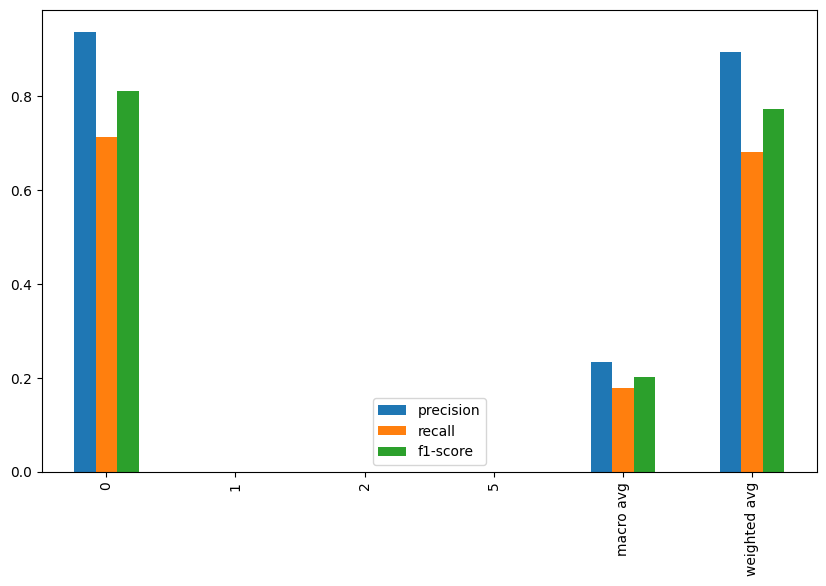

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Crear un DataFrame a partir del informe de clasificación
report_df = pd.DataFrame(report).transpose()

# Excluir la última fila que contiene el promedio global
report_df = report_df.drop(['accuracy'], axis=0)

# Graficar las métricas de precision, recall y f1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(np.arange(len(report_df.index)), report_df.index, rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()